Neha Kale 2018130018<br>
Shivangi Kochrekar 2018130020<br>
Rishita Mote 2018130029

---

#**<center>ML Report</center>**

Machine Learning(ML) can be explained as automating and improving the learning process of computers based on their experiences without being actually programmed i.e. without any human assistance. The process starts with feeding good quality data and then training our machines(computers) by building machine learning models using the data and different algorithms. The choice of algorithms depends on what type of data we have and what kind of task we are trying to automate.







##Supervised Machine Learning

Data scientists use many different kinds of machine learning algorithms to discover patterns in big data that lead to actionable insights. At a high level, these different algorithms can be classified into two groups based on the way they “learn” about data to make predictions: **supervised and unsupervised learning.**

**Supervised Machine Learning:** The majority of practical machine learning uses supervised learning. Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output Y = f(X) . The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data. Supervised learning requires that the data used to train the algorithm is already labeled with correct answers.

---

###***Regression***
Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

###Linear Regression
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

***Aim:***
To apply linear regression to predict 

***Problem Statement:***


***Objective:***
1. To understand sklearn library and its functions
2. To understand linear regression
3. To understand data preprocessing techniques



####Methodology:

#####Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
!pip install kaggle
import os

#####Loading the Dataset

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivangikochrekar","key":"0c6d0fd8197597c427f1463f57c8278b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tanmoyx/covid19-patient-precondition-dataset

 79% 6.00M/7.56M [00:00<00:00, 60.5MB/s]
100% 7.56M/7.56M [00:00<00:00, 48.3MB/s]


In [6]:
!unzip covid19-patient-precondition-dataset.zip 

Archive:  covid19-patient-precondition-dataset.zip
  inflating: Catalogs.xlsx           
  inflating: Description.xlsx        
  inflating: covid.csv               


In [9]:
dataset=pd.read_csv('/content/covid.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####PRE PROCESSING

In [10]:
dataset=dataset.drop(columns=['id','entry_date','date_symptoms','date_died'],axis=1)
dataset=dataset.replace({97:np.nan,98:np.nan,99:np.nan})
dataset=dataset.dropna()
dataset['icu'].value_counts()

2.0    20438
1.0     2695
Name: icu, dtype: int64

In [11]:
ds1=dataset[dataset['icu']==2][1:3000]
ds2=dataset[dataset['icu']==1][1:2695]
frames=[ds1,ds2]
ds_new=pd.concat(frames)
new_dataset=ds_new.sample(frac=1)
df=new_dataset
new_dataset

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
46094,1.0,2.0,2.0,1.0,57.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
21655,1.0,2.0,2.0,1.0,45.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
105010,1.0,2.0,1.0,1.0,63.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
352174,1.0,2.0,1.0,2.0,30.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
112066,1.0,2.0,2.0,1.0,54.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53843,1.0,2.0,2.0,2.0,51.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0
99555,1.0,2.0,2.0,1.0,50.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
291429,1.0,2.0,1.0,1.0,35.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0
348885,1.0,2.0,1.0,1.0,67.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [12]:
new_dataset.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,5693.0,5693.0,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000
mean,1.0,2.0,1.726506,1.232215,52.167399,1.980327,1.667838,1.958546,1.972422,1.959775,1.642543,1.952925,1.947831,1.731425,1.949587,1.960126,1.699631,1.273142,1.526787
std,0.0,0.0,0.445791,0.422283,20.467144,0.138887,0.471030,0.199356,0.163774,0.196503,0.479293,0.211819,0.222388,0.443257,0.218814,0.195679,0.458459,0.553254,0.499326
min,1.0,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,2.0,1.000000,1.000000,41.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.0,2.0,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,1.0,2.0,2.000000,1.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,1.0,2.0,2.000000,2.000000,101.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000


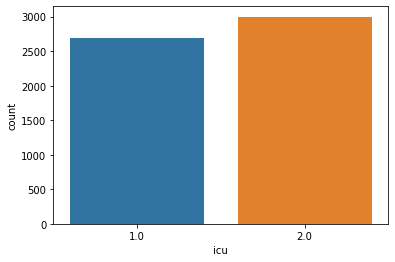

In [13]:
sns.countplot(x='icu',data=new_dataset)

Text(0.5, 1.0, 'pneumonia')

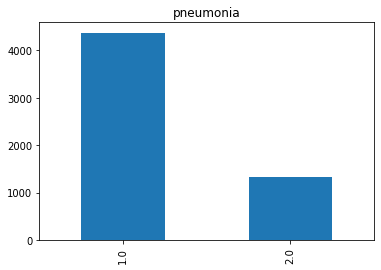

In [14]:
df=df[df['pneumonia']!=99]
df['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('pneumonia')

Text(0.5, 1.0, 'Pregnancy')

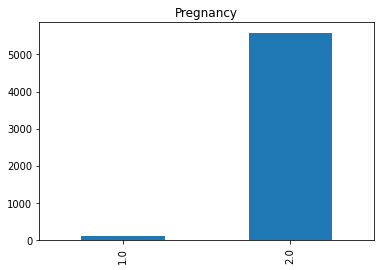

In [15]:
df=df[df['pregnancy']!=97]
df=df[df['pregnancy']!=98]
df['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Pregnancy')

Text(0.5, 1.0, 'Diabetes')

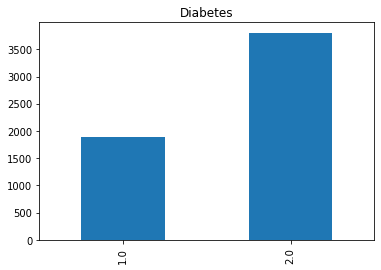

In [16]:
df=df[df['diabetes']!=98]
df['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

Text(0.5, 1.0, 'COPD')

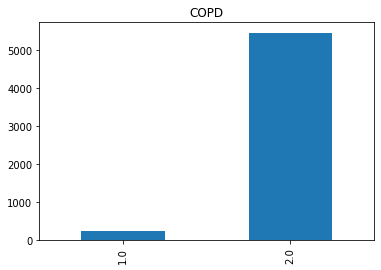

In [17]:
df=df[df['copd']!=98]
df['copd'].value_counts().sort_index().plot.bar()
plt.title('COPD')

Text(0.5, 1.0, 'Asthma')

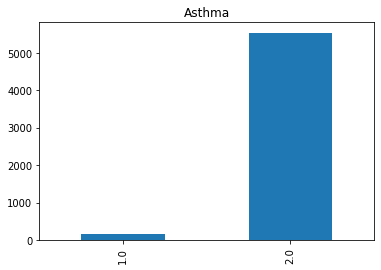

In [18]:
df=df[df['asthma']!=98]
df['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asthma')

Text(0.5, 1.0, 'Hypertension')

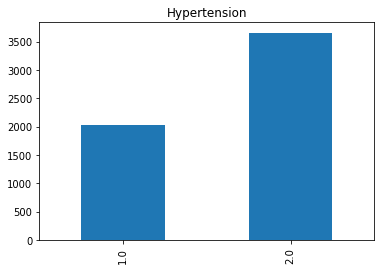

In [19]:
df=df[df['hypertension']!=98]
df['hypertension'].value_counts().sort_index().plot.bar()
plt.title('Hypertension')

Text(0.5, 1.0, 'Other Disease')

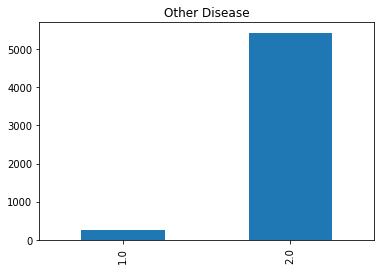

In [20]:
df=df[df['other_disease']!=98]
df['other_disease'].value_counts().sort_index().plot.bar()
plt.title('Other Disease')

Text(0.5, 1.0, 'Cardiovascular')

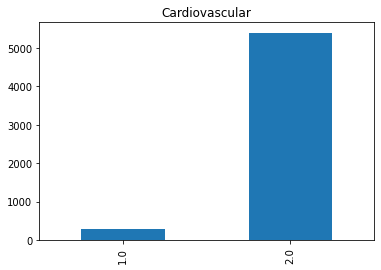

In [21]:
df=df[df['cardiovascular']!=98]
df['cardiovascular'].value_counts().sort_index().plot.bar()
plt.title('Cardiovascular')

Text(0.5, 1.0, 'Obesity')

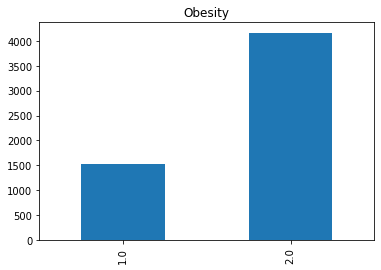

In [22]:
df=df[df['obesity']!=98]
df['obesity'].value_counts().sort_index().plot.bar()
plt.title('Obesity')

Text(0.5, 1.0, 'Contact other covid')

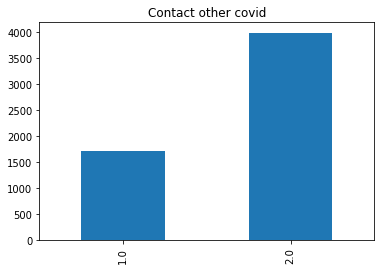

In [23]:
df=df[df['contact_other_covid']!=99]
df['contact_other_covid'].value_counts().sort_index().plot.bar()
plt.title('Contact other covid')

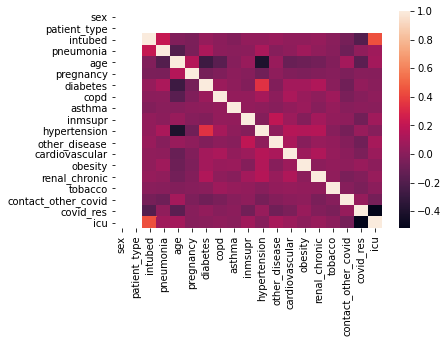

In [24]:
sns.heatmap(new_dataset.corr())

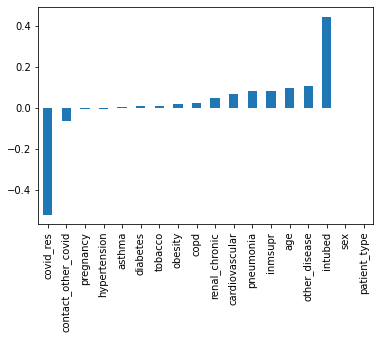

In [25]:
new_dataset.corr()['icu'][:-1].sort_values().plot(kind='bar')

#####Selecting columns for training purpose

In [26]:
y=new_dataset.icu

data=['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res']
train_data=pd.get_dummies(new_dataset, columns = data)

train_data=train_data.drop(columns=['icu'],axis=1)

#printing the training dataset
train_data.shape,y.shape
train_data

,age,sex_1.0,patient_type_2.0,intubed_1.0,intubed_2.0,pneumonia_1.0,pneumonia_2.0,pregnancy_1.0,pregnancy_2.0,diabetes_1.0,diabetes_2.0,copd_1.0,copd_2.0,asthma_1.0,asthma_2.0,inmsupr_1.0,inmsupr_2.0,hypertension_1.0,hypertension_2.0,other_disease_1.0,other_disease_2.0,cardiovascular_1.0,cardiovascular_2.0,obesity_1.0,obesity_2.0,renal_chronic_1.0,renal_chronic_2.0,tobacco_1.0,tobacco_2.0,contact_other_covid_1.0,contact_other_covid_2.0,covid_res_1.0,covid_res_2.0,covid_res_3.0
46094,57.0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0
21655,45.0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
105010,63.0,1,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
352174,30.0,1,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
112066,54.0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53843,51.0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0
99555,50.0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0
291429,35.0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0
348885,67.0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0


##### Building Training and Testing Model


In [27]:
#dependent and independent variables
X=new_dataset.iloc[:,:-1]
y=new_dataset.iloc[:,18]
X.shape,y.shape

((5693, 18), (5693,))

In [28]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_data,y,test_size=0.2,random_state=0,stratify=y)

#####FEATURE SCALING

In [29]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#####Training the Linear Regression model

In [30]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred_linear= regressor.predict(X_test)
y_pred_linear

array([1.80566406, 0.82128906, 1.77539062, ..., 1.72558594, 1.75976562,
       1.20410156])

In [32]:
print("Accuracy is:",accuracy_score(y_test,y_pred_linear.round(), normalize=True))

Accuracy is: 0.8217734855136084


####***Conclusion:***
1. We learnt about various models provided by ScikitLearn
2. Understood various algorithms
3. Understood Data processing techniques
4. We found out the relevant features for the model which were pneumonia, diabetes, asthma, inmsupr, hypertension, other_diseases, cardiovascular,obesity,renal_chronic, contact_other_covid.


###Logistic regression
Logistic regression is a statistical model that uses Logistic function to model the conditional probability. This is read as the conditional probability of Y=1, given X or conditional probability of Y=0, given X. An example of logistic regression can be to find if a person will default their credit card payment or not.

***Aim:*** To apply linear regression to predict 

***Objective:***
1. To understand sklearn library and its functions
2. To understand logistic regression
3. To understand data preprocessing techniques



####Methodology:

#####Training the Logistic Regression model

In [33]:
from sklearn.linear_model import LogisticRegression
def LR(X_train,y_train,X_test,y_test):
    clf = LogisticRegression(random_state=0,class_weight='balanced').fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy is:",accuracy_score(y_test,y_pred))  
    return y_pred

y_pred_logistic=LR(X_train,y_train,X_test,y_test)

Accuracy is: 0.8226514486391572


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_linear.round())
print(cm)

[[392 147]
 [ 56 544]]


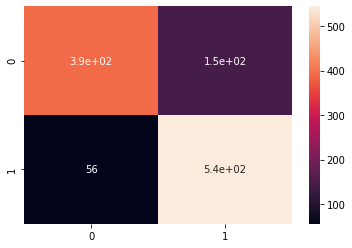

In [35]:
sns.heatmap(cm,annot=True)

In [39]:
from sklearn.metrics import classification_report
report= classification_report(y_test, y_pred_linear.round())
print(report)


              precision    recall  f1-score   support

         1.0       0.88      0.73      0.79       539
         2.0       0.79      0.91      0.84       600

    accuracy                           0.82      1139
   macro avg       0.83      0.82      0.82      1139
weighted avg       0.83      0.82      0.82      1139



####Results:

#####Classification Report

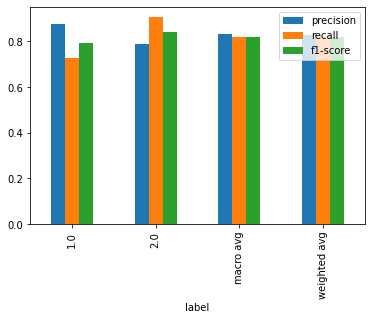

In [40]:
import pandas as pd

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(y_test, y_pred_linear.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

####Conclusion:

1. We got a clear understanding of logistic regression
2. Implemented the same using sklearn
3. The algorithm gave 83% accuracy
4. Enhanced accuracy using data preprocessing
